## Approximation of $\int_{-\infty}^{\infty}{e^{-x^2}dx}$

### Method of choice: Midpoint rule

$$\int_a^b{f(x)dx} \approx (b-a)f\left(\frac{a+b}{2}\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.exp(-x**2)

In [3]:
def numerical_int(a, b, step, f):
    res = 0

    x = a
    while x < b:
        res += f(x + step/2) * step
        x += step
    
    return res

In [4]:
a = -200
b = 200
dx = 0.1

res = numerical_int(a, b, dx, f)
sqrtpi = np.sqrt(np.pi)
error = np.abs(res - sqrtpi) 

print(f"Estimation: {res}")
print(f"Square root of pi: {sqrtpi}")
print(f"Error: {error}")
print(f"Log10 Error: {np.log10(error)}")

Estimation: 1.7724538509055168
Square root of pi: 1.7724538509055159
Error: 8.881784197001252e-16
Log10 Error: -15.05149978319906


In [ ]:
# Plot error to timestep
dx = np.logspace(0, -4, 400)
res = []
log10error = []
log10dx = np.log10(dx)

for i in range(len(dx)):
    res.append(numerical_int(a, b, dx[i], f))
    log10error.append(np.log10(abs(res[i] - sqrtpi)))

/tmp/ipykernel_3872/668563802.py:9: RuntimeWarning: divide by zero encountered in log10
  log10error.append(np.log10(abs(res[i] - sqrtpi)))


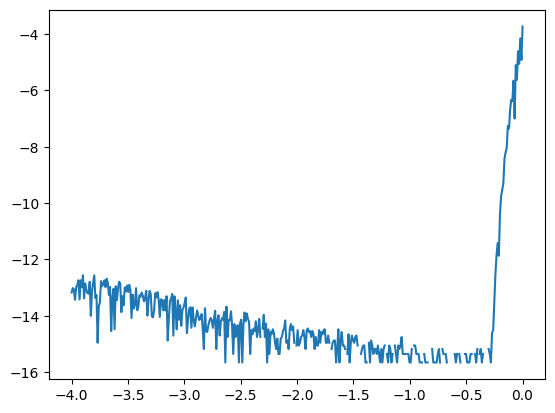

In [ ]:
plt.plot(log10dx, log10error)

### Kahan Summation:

In [ ]:
def numerical_int_kahan(a, b, step, func):
    res = 0.0
    c = 0.0  # A running compensation for lost low-order bits
    x = a
    while x < b:
        y = (func(x + step/2) * step) - c
        t = res + y
        c = (t - res) - y
        res = t
        x += step
    return res

In [ ]:
# Plot error to timestep
dx = np.logspace(0, -4, 400)
res = []
log10error = []
log10dx = np.log10(dx)

for i in range(len(dx)):
    res.append(numerical_int_kahan(a, b, dx[i], f))
    log10error.append(np.log10(abs(res[i] - sqrtpi)))

/tmp/ipykernel_22704/66792877.py:9: RuntimeWarning: divide by zero encountered in log10
  log10error.append(np.log10(abs(res[i] - sqrtpi)))


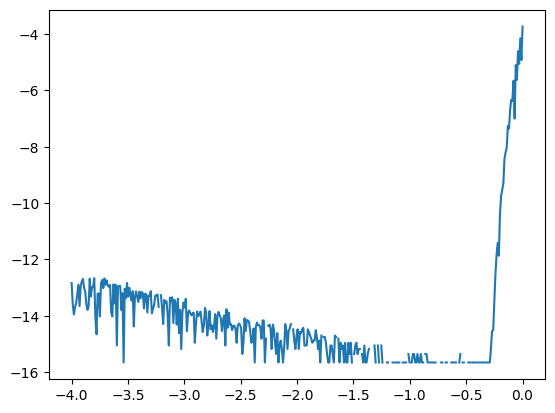

In [ ]:
plt.plot(log10dx, log10error)

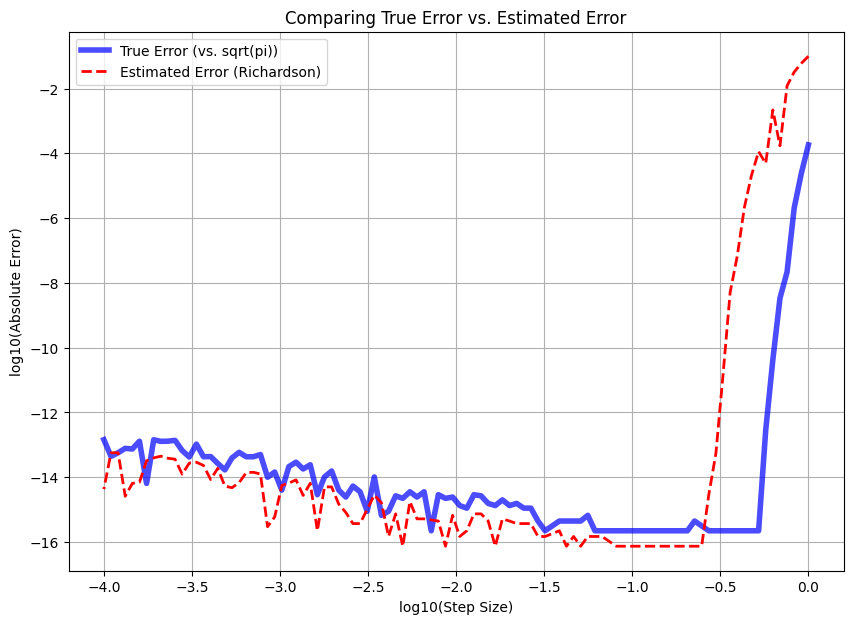

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# (Your functions f and numerical_int remain the same)
def f(x):
    return np.exp(-x**2)

def numerical_int(a, b, step, func):
    res = 0.0
    x = a
    # Use Kahan summation for better stability at small steps
    c = 0.0  
    while x < b:
        y = (func(x + step / 2.0) * step) - c
        t = res + y
        c = (t - res) - y
        res = t
        x += step
    return res

a = -10.0
b = 10.0
sqrtpi = np.sqrt(np.pi) # We'll still use this to compare methods

# Generate a single set of logarithmically spaced steps
dx_h = np.logspace(0, -4, 100)
dx_2h = 2 * dx_h

# Calculate results for both sets of steps
results_h = [numerical_int(a, b, step, f) for step in dx_h]
results_2h = [numerical_int(a, b, step, f) for step in dx_2h]

# --- Calculate error and log-error using two methods ---
# 1. Using the true value (for comparison)
true_log_errors = [np.log10(abs(res - sqrtpi)) for res in results_h if abs(res - sqrtpi) > 0]
dx_plot_true = [dx for i, dx in enumerate(dx_h) if abs(results_h[i] - sqrtpi) > 0]

# 2. Using Richardson Extrapolation (the "direct" method)
estimated_errors = []
dx_plot_est = []
for i in range(len(dx_h)):
    est_err = (1/3.0) * abs(results_h[i] - results_2h[i])
    if est_err > 0:
        estimated_errors.append(est_err)
        dx_plot_est.append(dx_h[i])

estimated_log_errors = np.log10(estimated_errors)

# --- Plotting ---
plt.figure(figsize=(10, 7))

# Plot the error calculated the "normal" way
plt.plot(np.log10(dx_plot_true), true_log_errors, 'b-', label='True Error (vs. sqrt(pi))', linewidth=4, alpha=0.7)

# Plot the error estimated directly from the results
plt.plot(np.log10(dx_plot_est), estimated_log_errors, 'r--', label='Estimated Error (Richardson)', linewidth=2)

plt.title("Comparing True Error vs. Estimated Error")
plt.xlabel("log10(Step Size)")
plt.ylabel("log10(Absolute Error)")
plt.legend()
plt.grid(True)
plt.show()

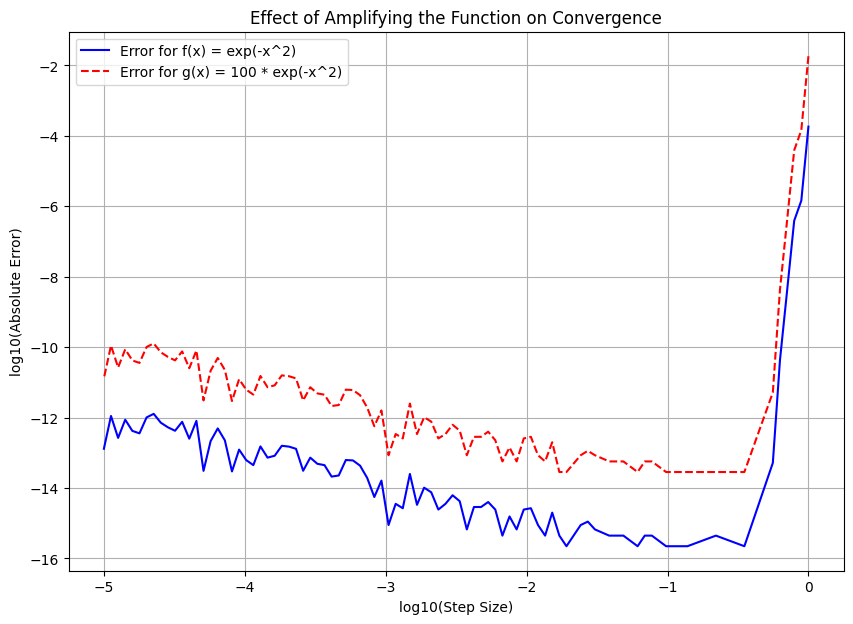

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# (Your numerical_int function remains the same)
def numerical_int(a, b, step, func):
    res = 0.0
    x = a
    c = 0.0  # Kahan summation
    while x < b:
        y = (func(x + step / 2.0) * step) - c
        t = res + y
        c = (t - res) - y
        res = t
        x += step
    return res

# --- Original Function Setup ---
def f(x):
    return np.exp(-x**2)

# --- Amplified Function Setup ---
def g(x):
    return 100.0 * np.exp(-x**2)

a = -10.0
b = 10.0

# True values for both
sqrtpi = np.sqrt(np.pi)
true_value_f = sqrtpi
true_value_g = 100.0 * sqrtpi

# Generate a single set of step sizes
dx_steps = np.logspace(0, -5, 100)

# --- Calculate Errors for Both Functions ---
log_errors_f = []
log_errors_g = []
dx_plot = []

for step in dx_steps:
    # Calculate for original function
    res_f = numerical_int(a, b, step, f)
    error_f = abs(res_f - true_value_f)
    
    # Calculate for amplified function
    res_g = numerical_int(a, b, step, g)
    error_g = abs(res_g - true_value_g)
    
    if error_f > 0 and error_g > 0:
        dx_plot.append(step)
        log_errors_f.append(np.log10(error_f))
        log_errors_g.append(np.log10(error_g))

# --- Plotting ---
plt.figure(figsize=(10, 7))

log10_dx = np.log10(dx_plot)

# Plot the original error
plt.plot(log10_dx, log_errors_f, 'b-', label='Error for f(x) = exp(-x^2)')
# Plot the amplified error
plt.plot(log10_dx, log_errors_g, 'r--', label='Error for g(x) = 100 * exp(-x^2)')

plt.title("Effect of Amplifying the Function on Convergence")
plt.xlabel("log10(Step Size)")
plt.ylabel("log10(Absolute Error)")
plt.legend()
plt.grid(True)
plt.show()